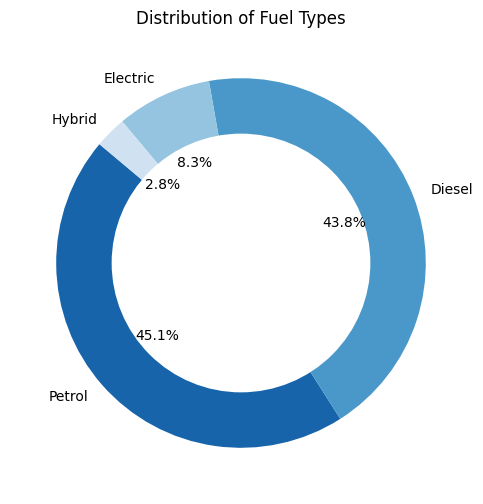

In [1]:
#***Graph 1***
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:\\Users\\user\\Downloads\\Final Cleaned.xlsx'
data = pd.read_excel('C:\\Users\\user\\Downloads\\Final Cleaned.xlsx')

# Group the data by 'Fuel Type' and count the number of occurrences of each type
fuel_type_counts = data['Fuel Type'].value_counts()

# Sort the fuel types by counts so the most used fuel type comes first
sorted_fuel_types = fuel_type_counts.sort_values(ascending=False)

# Plotting the donut chart
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues_r", len(sorted_fuel_types))  # Dark blue to light blue color palette
plt.pie(sorted_fuel_types, labels=sorted_fuel_types.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Adding a white circle at the center for donut shape

plt.title('Distribution of Fuel Types')
plt.show()


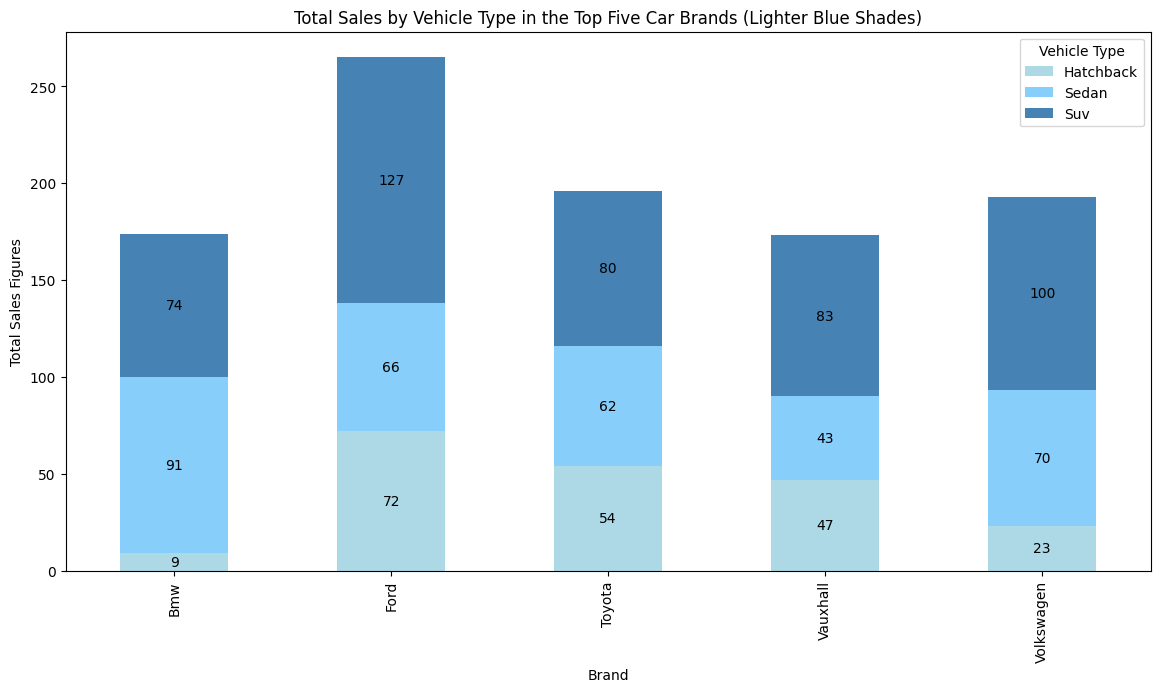

In [2]:
#***Graph 2***
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\user\\Downloads\\Final Cleaned.xlsx'
data = pd.read_excel(file_path)

# Find the top five car brands preferred by consumers based on units sold
top_brands = data.groupby('Brand')['Units Sold'].sum().nlargest(5).index

# Filter the data to include only these top brands
top_brands_data = data[data['Brand'].isin(top_brands)]

# Group total sales by each brand and vehicle type
popularity_by_type = top_brands_data.groupby(['Brand', 'Type'])['Units Sold'].sum().unstack(fill_value=0)

# Define lighter shades of blue for the bar chart
lighter_blues = ['#add8e6', '#87cefa', '#4682b4']

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 7))
popularity_by_type.plot(kind='bar', stacked=True, color=lighter_blues, ax=ax)

# Label each bar segment with the total sales figure
for c in ax.containers:
    ax.bar_label(c, label_type='center')

plt.title('Total Sales by Vehicle Type in the Top Five Car Brands (Lighter Blue Shades)')
plt.xlabel('Brand')
plt.ylabel('Total Sales Figures')
plt.legend(title='Vehicle Type')
plt.show()

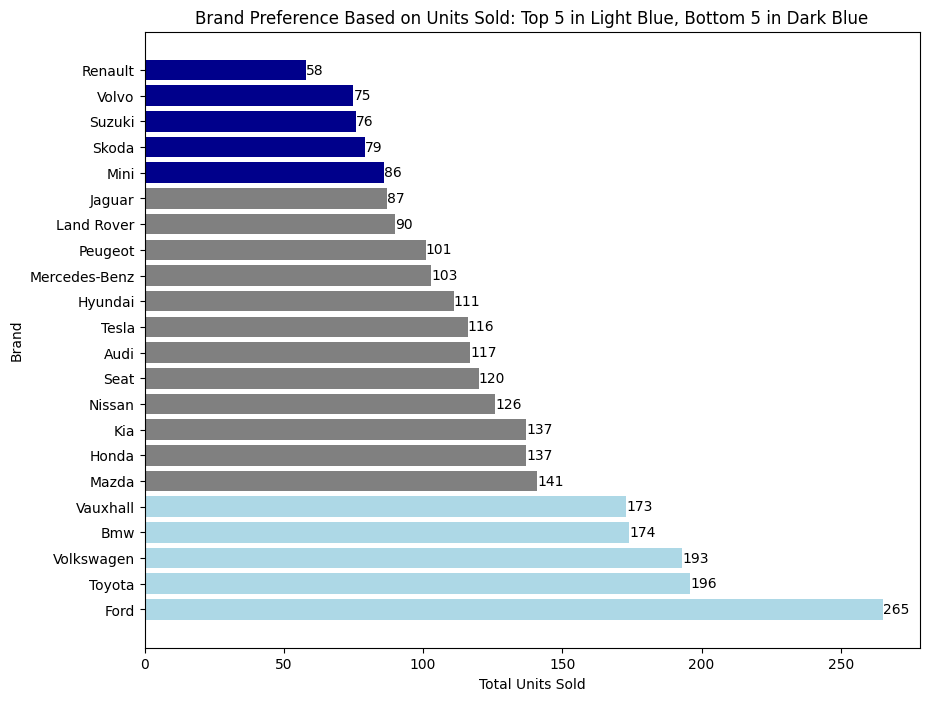

In [3]:
#***Graph 3***
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:\\Users\\user\\Downloads\\Final Cleaned.xlsx'
data = pd.read_excel(file_path)

# Grouping data by brand and summing up the units sold for each brand
brand_preference = data.groupby('Brand')['Units Sold'].sum().sort_values(ascending=False)

# Setting colors: top 5 in light blue, bottom 5 in dark blue, others in grey
num_brands = len(brand_preference)
colors = ['lightblue' if i < 5 else 'darkblue' if i >= num_brands - 5 else 'grey' for i in range(num_brands)]

# Plotting the updated chart
plt.figure(figsize=(10, 8))
bars = plt.barh(brand_preference.index, brand_preference, color=colors)

# Adding the text above the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center', ha='left')

plt.title('Brand Preference Based on Units Sold: Top 5 in Light Blue, Bottom 5 in Dark Blue')
plt.xlabel('Total Units Sold')
plt.ylabel('Brand')
plt.show()

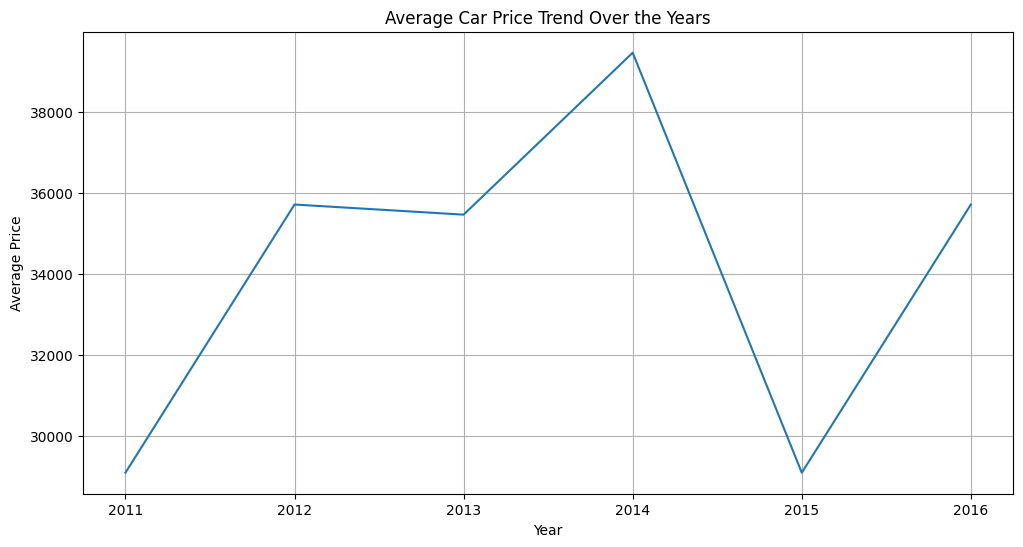

In [4]:
#***Graph 4***
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('C:\\Users\\user\\Downloads\\Final Cleaned.xlsx')

# Calculate the average price per year
average_price_per_year = data.groupby('Year')['Price'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_price_per_year, x='Year', y='Price')
plt.title('Average Car Price Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


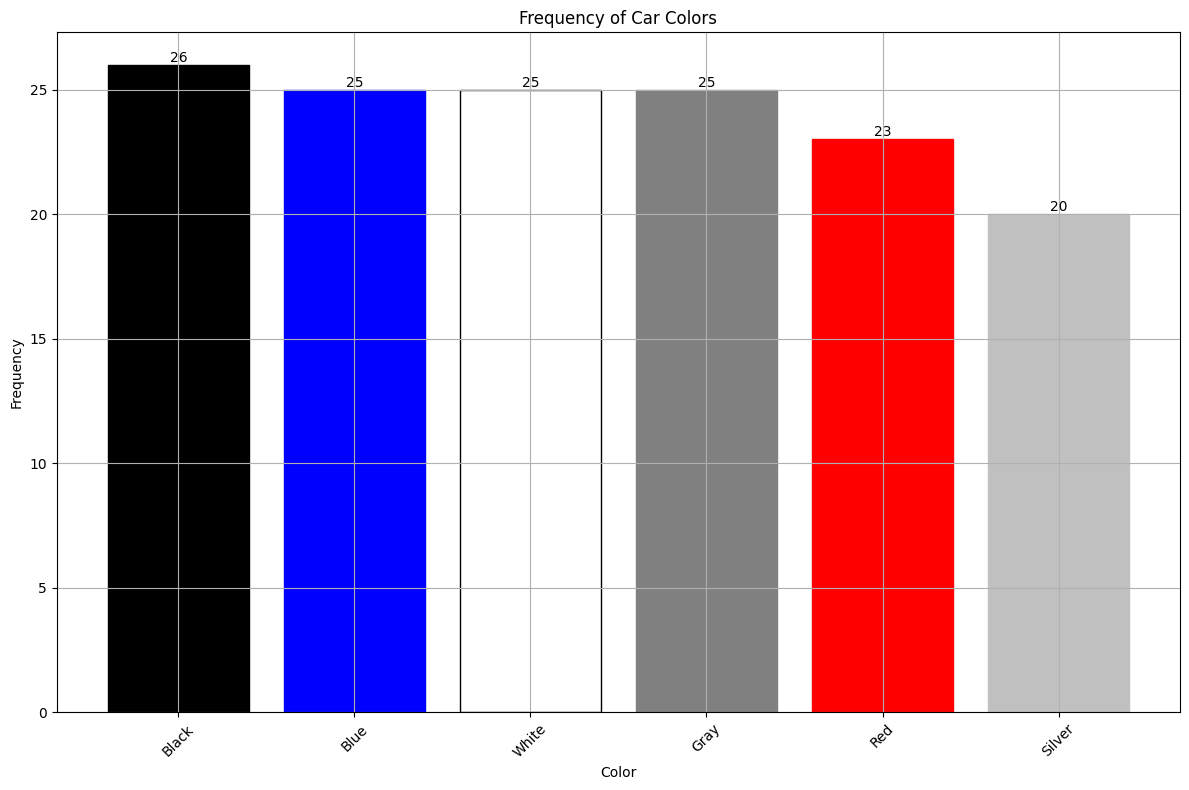

In [5]:
#***Graph 5***
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('C:\\Users\\user\\Downloads\\Final Cleaned.xlsx')

# Counting the frequency of each car color
color_counts = data['Color'].value_counts()


# Adjusting the colors to make them visible, especially for white
def adjust_color(color):
    """ Adjust the color for better visibility in the plot """
    if color == 'white':
        return {'color': 'white', 'edgecolor': 'black'}
    else:
        return color


colors = color_counts.index.map(lambda x: x.lower())  # Lowercase the color names
adjusted_colors = [adjust_color(color) for color in colors]

# Plotting the bar graph with adjusted colors and adding numbers on top of the bars
plt.figure(figsize=(12, 8))

bars = plt.bar(color_counts.index, color_counts.values)

# Applying color adjustments and adding text
for bar, color in zip(bars, adjusted_colors):
    if isinstance(color, dict):
        bar.set_color(color['color'])
        bar.set_edgecolor(color['edgecolor'])
    else:
        bar.set_color(color)

    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')

plt.title('Frequency of Car Colors')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()